## Telco Customer Churn

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve # compute receiver operating characteristic (ROC)
from sklearn.metrics import roc_auc_score # compute area under the receiver operating characteristic curve (ROC AUC) from prediction scores

from sklearn.preprocessing import LabelEncoder # encode target labels with value between 0 and n_classes-1.

import matplotlib.pyplot as plt

### Load and Read the Data

In [2]:
path = 'C:\\Users\\LinaVeltman\\Documents\\projects\\telco_customer_predict\\data\\WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(path)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Basic Date Information

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.shape

(7043, 21)

In [6]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


### Data Cleansing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df['OnlineBackup']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
7038     No
7039    Yes
7040     No
7041     No
7042     No
Name: OnlineBackup, Length: 7043, dtype: object

In [9]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

So, TotalCharges column has numeric values but it has object type. So, let's see unique values to find out what the reason is

In [10]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
# pd.to_numeric(df['TotalCharges'])

We got an error

ValueError: Unable to parse string " " at position 488

so in this column there is ' ' symbol that's why it has object type

In [12]:
len(df[df['TotalCharges'] == ' '])

11

find the rows in the dataset where there are no input for TotalCharges

In [13]:
total_charges = df[df['TotalCharges'] == ' ']
total_charges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


check that all customers with tenure 0 have TotalCharges set as ' '

In [14]:
new_customers = df[df['tenure'] == 0]
total_charges == new_customers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
753,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
936,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1082,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1340,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3331,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3826,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4380,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5218,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6670,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


All of the customers where the dataset has no inputs for TotalCharges are new customers (because they have tenure set to 0) that have not yet transacted with the company but are already subscribed.

Let's replace ' ' with zero 0

In [15]:
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = 0

Convert TotalCharges to numerical values

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [17]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Check that the dataset does not contain any duplicated rows or customer IDs

In [18]:
dupl = df[df.duplicated()].count() # duplicated rows
dupl_id = df['customerID'][df['customerID'].duplicated()].count() # duplicated customers

print('Duplicated rows: ', dupl.sum())
print('Duplicated customer ids: ', dupl_id)

Duplicated rows:  0
Duplicated customer ids:  0


### Exploratory Data Analysis

In [19]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Categorical Data

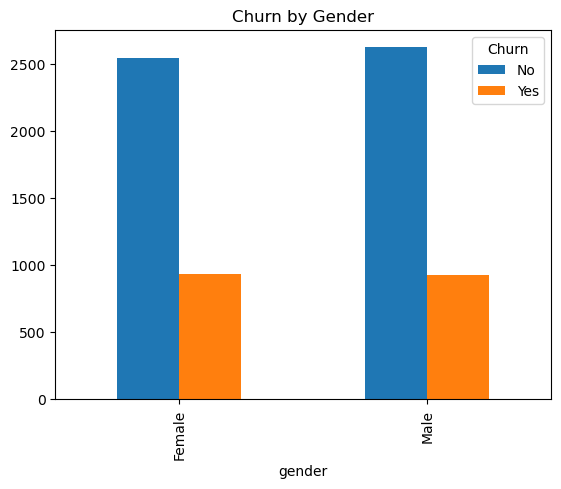

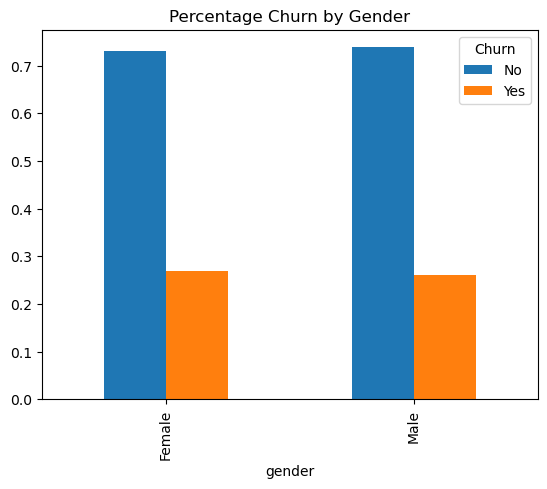

In [20]:
# churn by Gender
gender = (df.groupby('gender')['Churn']
          .value_counts()
          .unstack()
          .plot(kind='bar')
          .set_title('Churn by Gender'))

gender_percent = (df.groupby('gender')['Churn']
          .value_counts(normalize=True)
          .unstack()
          .plot(kind='bar')
          .set_title('Percentage Churn by Gender'))

The distribution between males and females is nearly equal, with approximately a 50/50 split. This feature appears to lack significance in predicting churn.

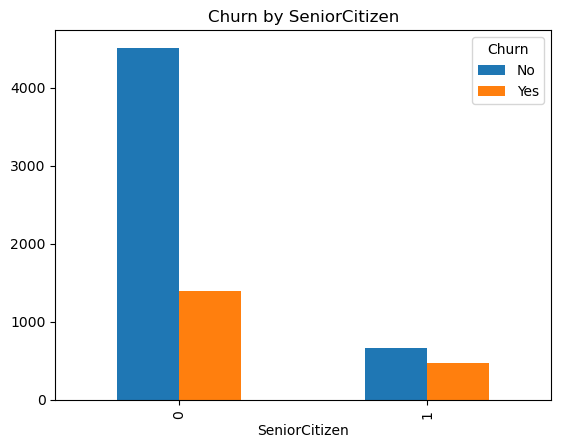

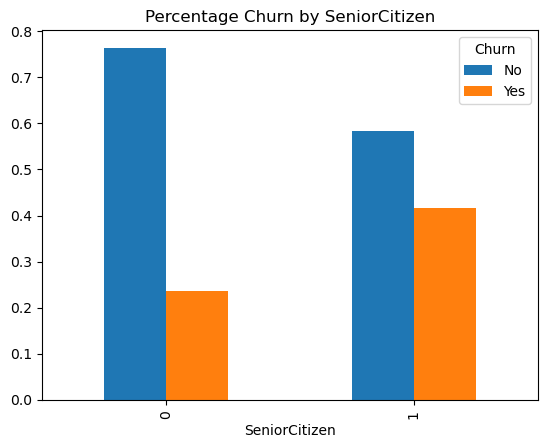

In [21]:
# churn by SeniorCitizen
senior = (df.groupby('SeniorCitizen')['Churn']
          .value_counts()
          .unstack()
          .plot(kind='bar')
          .set_title('Churn by SeniorCitizen'))

senior_percent = (df.groupby('SeniorCitizen')['Churn']
          .value_counts(normalize=True)
          .unstack()
          .plot(kind='bar')
          .set_title('Percentage Churn by SeniorCitizen'))

In [22]:
len(df[df['SeniorCitizen'] == 1])

1142

In [23]:
len(df[df['SeniorCitizen'] == 0])

5901

In [24]:
1142 / (5901+1142) * 100

16.21468124378816

From the 7043 customers in the dataset, senior citizen are 1142, which represent 16% of the total customers. However, Senior citizens are more likely to churn, with 42% of them canceling their subscription compared to 24% for non-senior citizens.

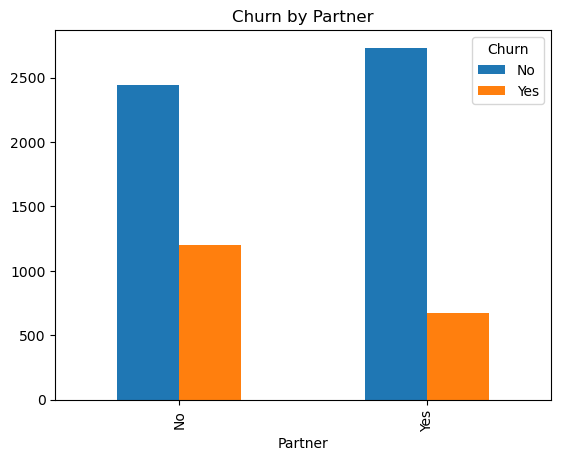

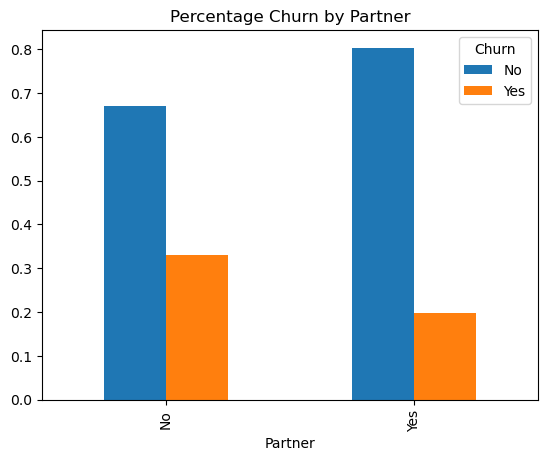

In [25]:
# churn by Partner
partner = (df.groupby('Partner')['Churn']
          .value_counts()
          .unstack()
          .plot(kind='bar')
          .set_title('Churn by Partner'))

partner_percent = (df.groupby('Partner')['Churn']
          .value_counts(normalize=True)
          .unstack()
          .plot(kind='bar')
          .set_title('Percentage Churn by Partner'))

In [26]:
len(df[df['Partner'] == 'Yes'])

3402

In [27]:
len(df[df['Partner'] == 'No'])

3641

The number of customers with a partner is approximately equal to the number of single customers.

Nevertheless, there is a distinct difference in churn rates, with 20% of customers with partners unsubscribing compared to 33% of single customers.

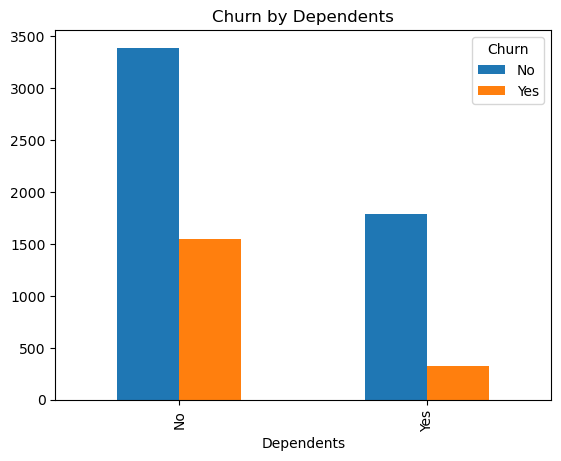

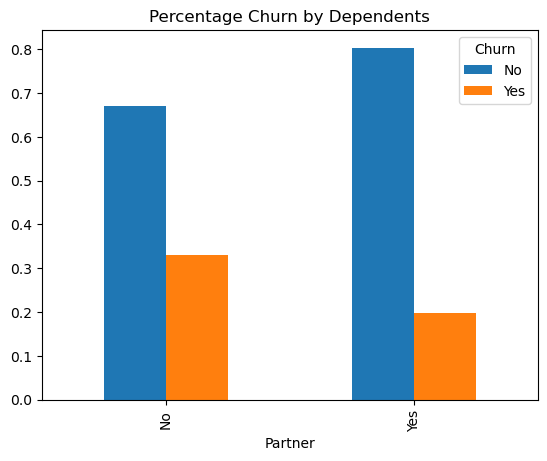

In [28]:
# churn by Dependents
dependents = (df.groupby('Dependents')['Churn']
          .value_counts()
          .unstack()
          .plot(kind='bar')
          .set_title('Churn by Dependents'))

dependents_percent = (df.groupby('Partner')['Churn']
          .value_counts(normalize=True)
          .unstack()
          .plot(kind='bar')
          .set_title('Percentage Churn by Dependents'))

In [29]:
len(df[df['Dependents'] == 'Yes']) / len(df)

0.2995882436461735

30% of the customers in the dataset have dependents, and 16% of these customers have churned. This is almost half the churn rate of customers without dependents, which is ~32%.

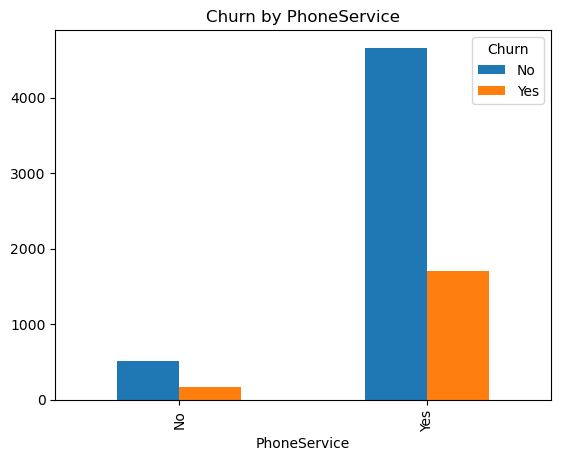

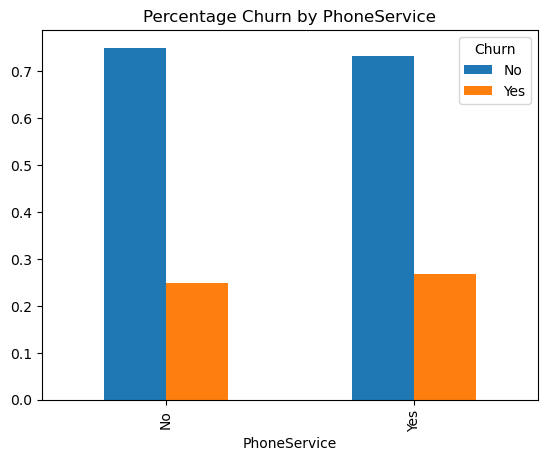

In [30]:
# churn by PhoneService
phone = (df.groupby('PhoneService')['Churn']
          .value_counts()
          .unstack()
          .plot(kind='bar')
          .set_title('Churn by PhoneService'))

phone_percent = (df.groupby('PhoneService')['Churn']
          .value_counts(normalize=True)
          .unstack()
          .plot(kind='bar')
          .set_title('Percentage Churn by PhoneService'))

The customers subscribed to the phone service represents 90% of the dataset, however when looking at the percentage churn there is no significant differences between the two sets.

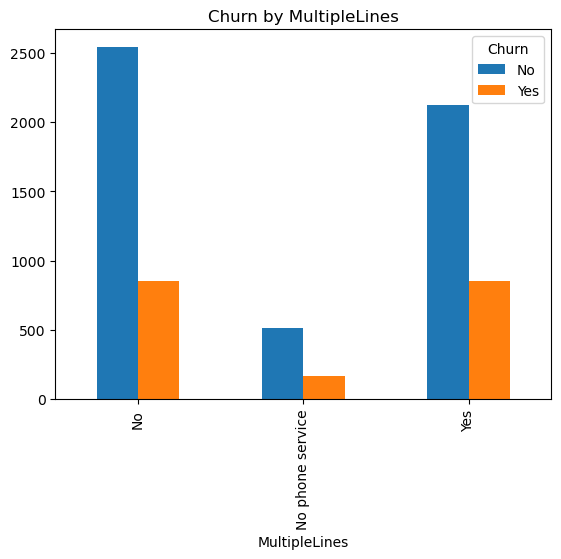

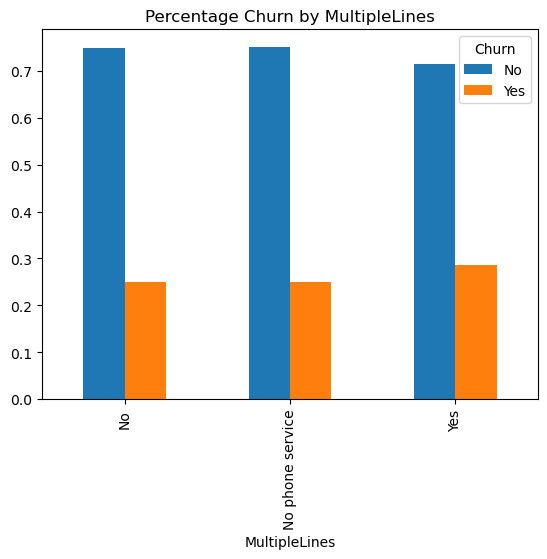

In [31]:
# churn by PhoneService
lines = (df.groupby('MultipleLines')['Churn']
          .value_counts()
          .unstack()
          .plot(kind='bar')
          .set_title('Churn by MultipleLines'))

lines_percent = (df.groupby('MultipleLines')['Churn']
          .value_counts(normalize=True)
          .unstack()
          .plot(kind='bar')
          .set_title('Percentage Churn by MultipleLines'))

There does no appear to be a difference in behaviour between customers with only one line and those that have none as both of these groups have a churn rate of 25%. However, the set of customers having multiple lines have a churn rate of 29%.

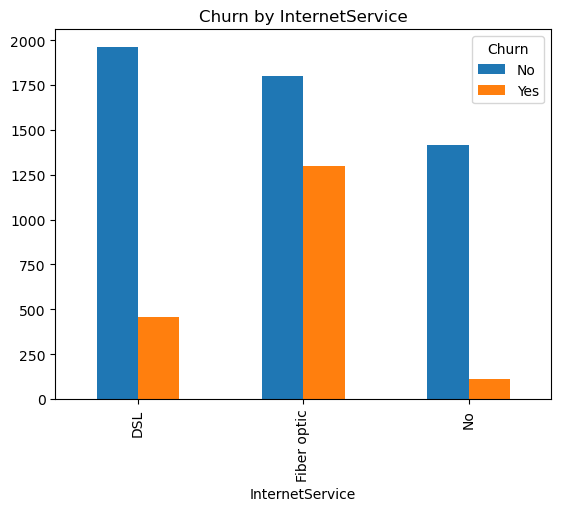

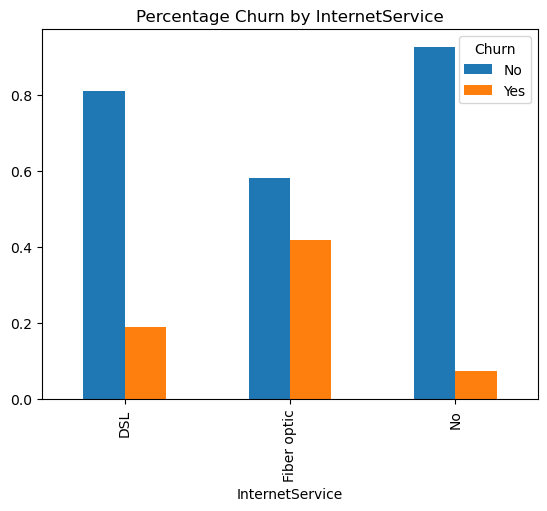

In [32]:
# churn by InternetService
internet = (df.groupby('InternetService')['Churn']
          .value_counts()
          .unstack()
          .plot(kind='bar')
          .set_title('Churn by InternetService'))

internet_percent = (df.groupby('InternetService')['Churn']
          .value_counts(normalize=True)
          .unstack()
          .plot(kind='bar')
          .set_title('Percentage Churn by InternetService'))

Churn rates vary among three different groups. Customers with fiber optic have the highest churn rate at 41%, while Digital Subscriber Line (DSL) customers have a churn rate of 19%. Customers without internet experience the lowest churn rate, standing at 7%.

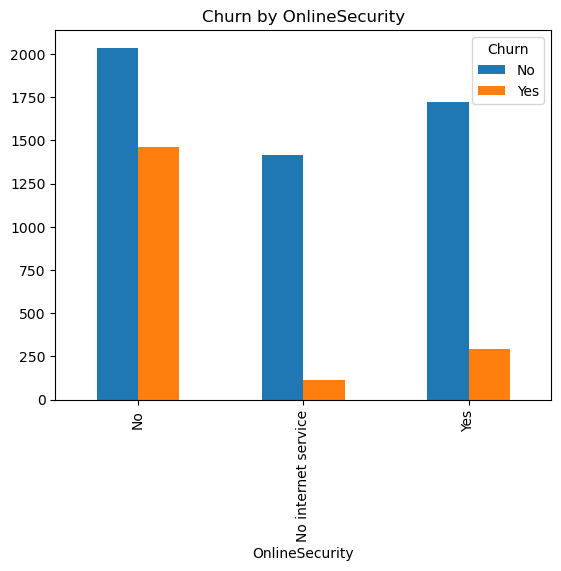

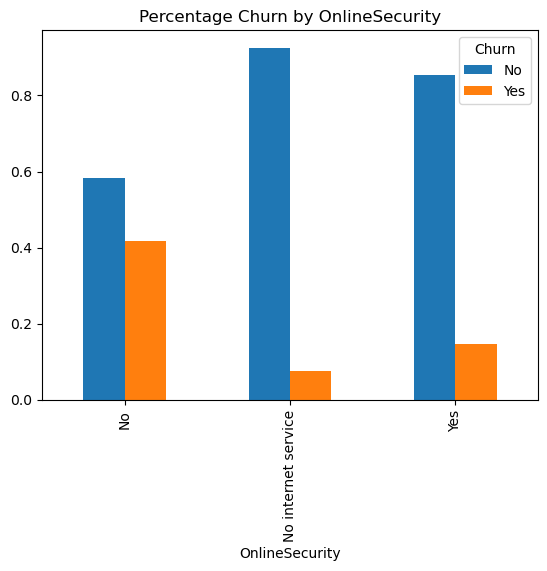

In [33]:
# churn by OnlineSecurity
security = (df.groupby('OnlineSecurity')['Churn']
          .value_counts()
          .unstack()
          .plot(kind='bar')
          .set_title('Churn by OnlineSecurity'))

security_percent = (df.groupby('OnlineSecurity')['Churn']
          .value_counts(normalize=True)
          .unstack()
          .plot(kind='bar')
          .set_title('Percentage Churn by OnlineSecurity'))

Customers without online security as part of their subscription experience a higher churn rate of 42%, whereas those with the security service included have a lower churn rate at 15%.

As indicated by the previous graph, customers without internet as part of their subscription exhibit a 7% churn rate, reflecting the loyalty of this particular group. Although they represent the smallest set of customers, their loyalty stands out

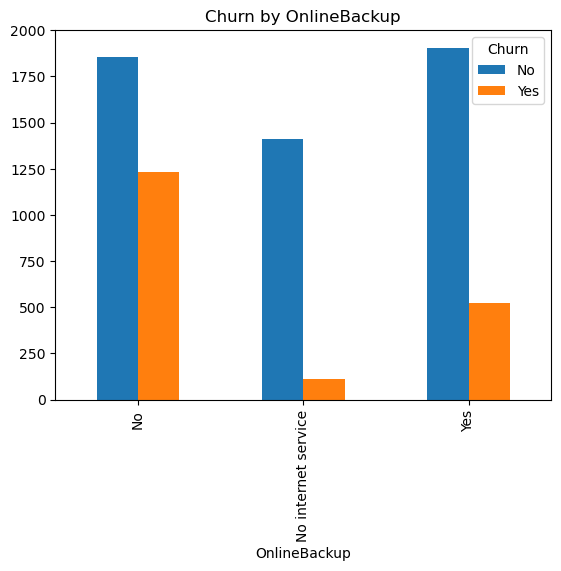

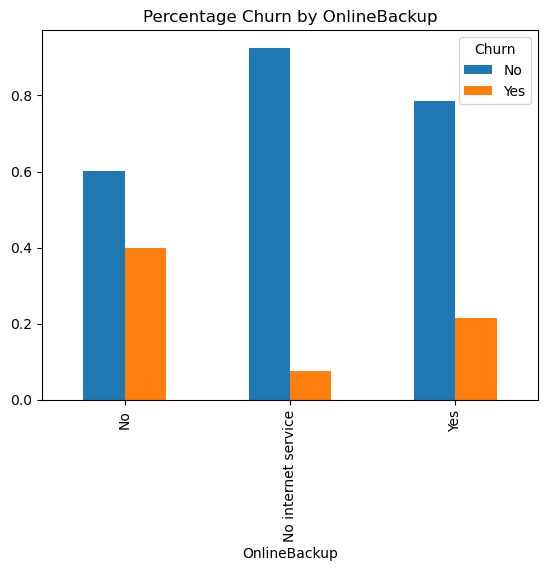

In [34]:
# churn by OnlineBackup
backup = (df.groupby('OnlineBackup')['Churn']
          .value_counts()
          .unstack()
          .plot(kind='bar')
          .set_title('Churn by OnlineBackup'))

backup_percent = (df.groupby('OnlineBackup')['Churn']
          .value_counts(normalize=True)
          .unstack()
          .plot(kind='bar')
          .set_title('Percentage Churn by OnlineBackup'))

The churn rate for customer without online backup is 40% compared with 22% for those that have an online backup which is 18 point percentage lower.

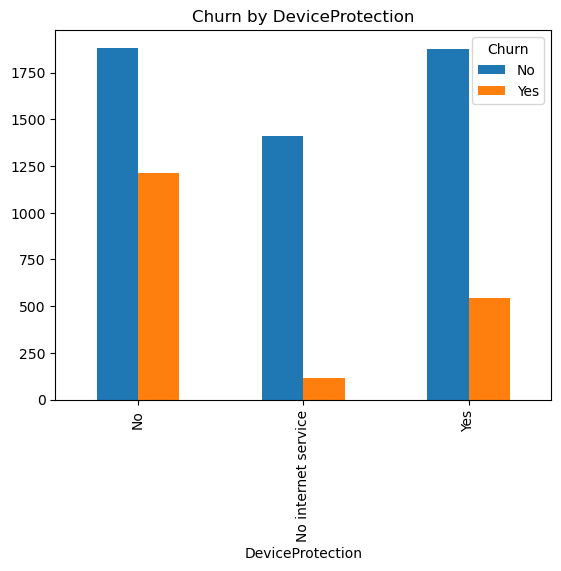

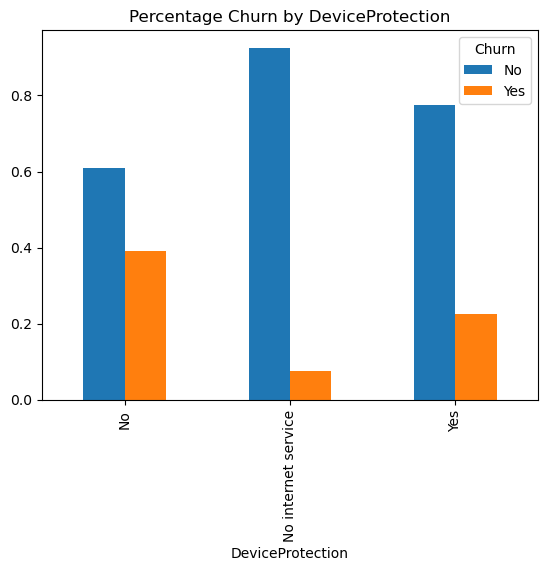

In [35]:
# churn by DeviceProtection
device_protection = (df.groupby('DeviceProtection')['Churn']
          .value_counts()
          .unstack()
          .plot(kind='bar')
          .set_title('Churn by DeviceProtection'))

device_protection_percent = (df.groupby('DeviceProtection')['Churn']
          .value_counts(normalize=True)
          .unstack()
          .plot(kind='bar')
          .set_title('Percentage Churn by DeviceProtection'))

Customers without a device protection represent 44% of the total customers while the ones with device protection represent 34% of the total customers (the rest being customers without internet service). The churn rate for customer without online backup is 39% compared with 23% for those that have an online backup which is 16 point percentage lower

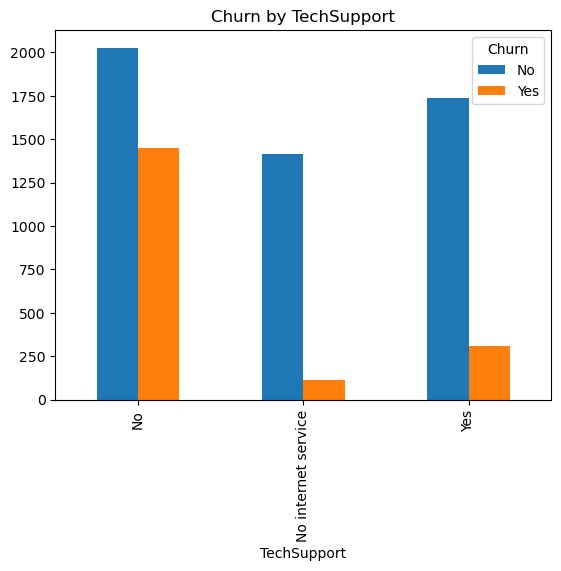

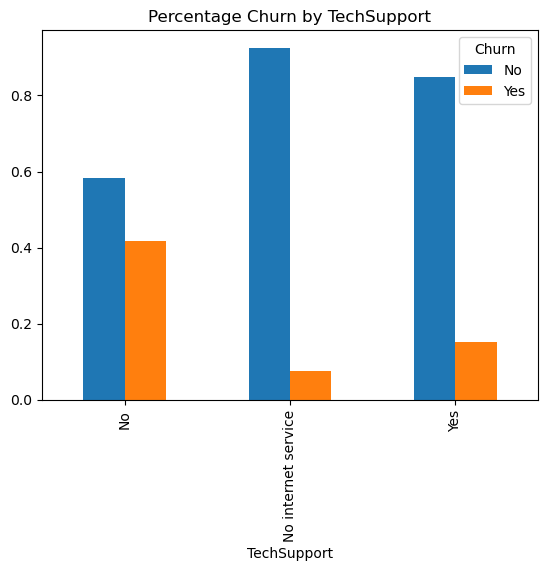

In [36]:
# churn by TechSupport
tech_sup = (df.groupby('TechSupport')['Churn']
          .value_counts()
          .unstack()
          .plot(kind='bar')
          .set_title('Churn by TechSupport'))

tech_sup_percent = (df.groupby('TechSupport')['Churn']
          .value_counts(normalize=True)
          .unstack()
          .plot(kind='bar')
          .set_title('Percentage Churn by TechSupport'))

The churn rate for customer without online backup is 41% compared with 15% for those that have an online backup which is 26 point percentage lower. There seems to be a significant difference in behaviour between customers with and without tech support.

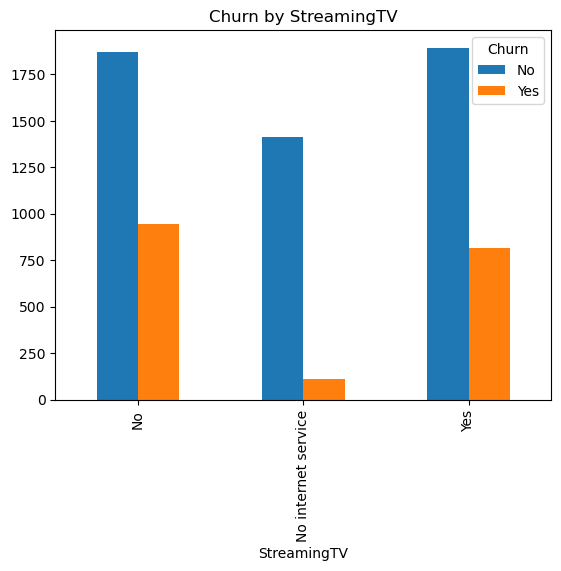

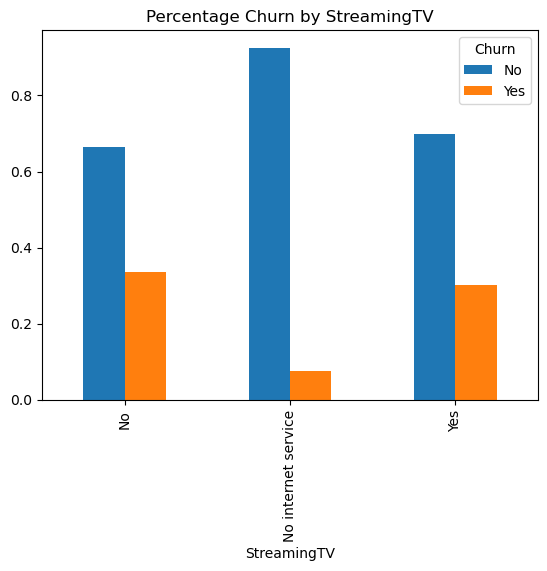

In [37]:
# churn by StreamingTV
stream_tv = (df.groupby('StreamingTV')['Churn']
          .value_counts()
          .unstack()
          .plot(kind='bar')
          .set_title('Churn by StreamingTV'))

stream_tv_percent = (df.groupby('StreamingTV')['Churn']
          .value_counts(normalize=True)
          .unstack()
          .plot(kind='bar')
          .set_title('Percentage Churn by StreamingTV'))

The churn rate for these two groups is 33% and 30% respectively.There does not seems to be a significant difference in behaviour between customers with and without tv streaming service.

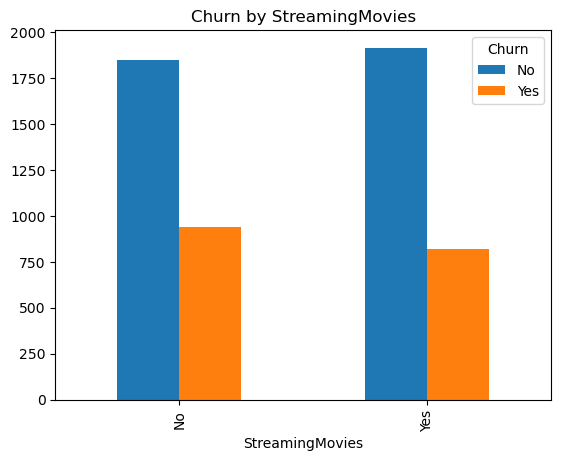

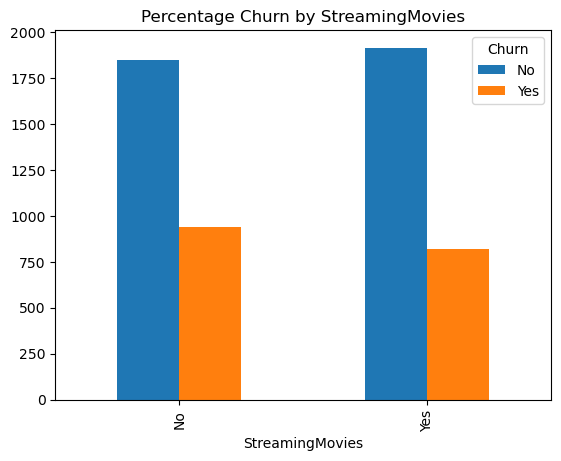

In [38]:
# churn by StreamingMovies
# removing the customers without internet service to avoid duplicating results already presented
stream_movies = (df[df['StreamingMovies'] != 'No internet service']
                 .groupby('StreamingMovies')['Churn']
                 .value_counts()
                 .unstack()
                 .plot(kind='bar')
                 .set_title('Churn by StreamingMovies'))

stream_movies_percent = (df[df['StreamingMovies'] != 'No internet service']
                 .groupby('StreamingMovies')['Churn']
                 .value_counts()
                 .unstack()
                 .plot(kind='bar')
                 .set_title('Percentage Churn by StreamingMovies'))

The churn rate for these two groups is 33% and 30% respectively.There does not seems to be a significant difference in behaviour between customers with and without movies streaming service.

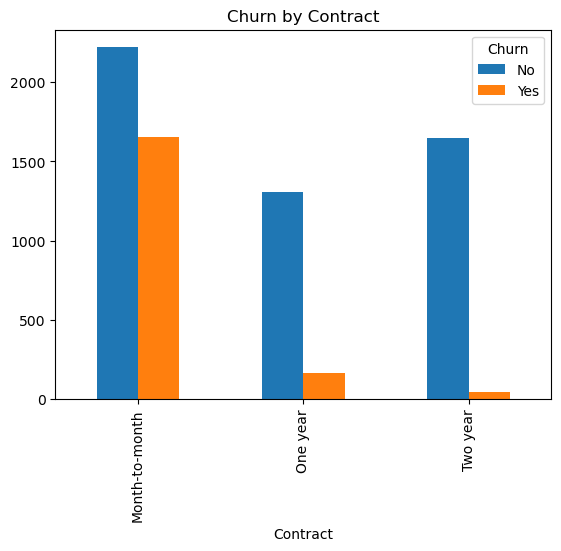

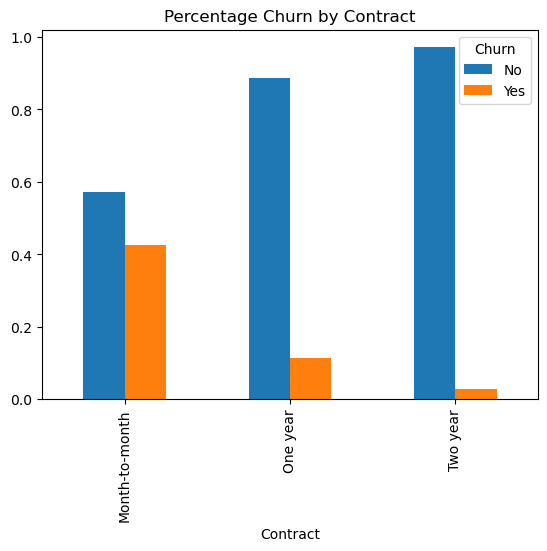

In [39]:
# churn by Contract
contract = (df.groupby('Contract')['Churn']
          .value_counts()
          .unstack()
          .plot(kind='bar')
          .set_title('Churn by Contract'))

contract_percent = (df.groupby('Contract')['Churn']
          .value_counts(normalize=True)
          .unstack()
          .plot(kind='bar')
          .set_title('Percentage Churn by Contract'))

Majority of cutomers prefer to have a contract month-to-month

The longer the customers contract last for the less likely they are to churn. Thus, rolling contracts have the highest churn rate with 43% compared with 11% for the one year contract and only 3% for the two years contract. Therefore, there is a significant difference in behaviour between customers depending on the period they are locked in their contract.

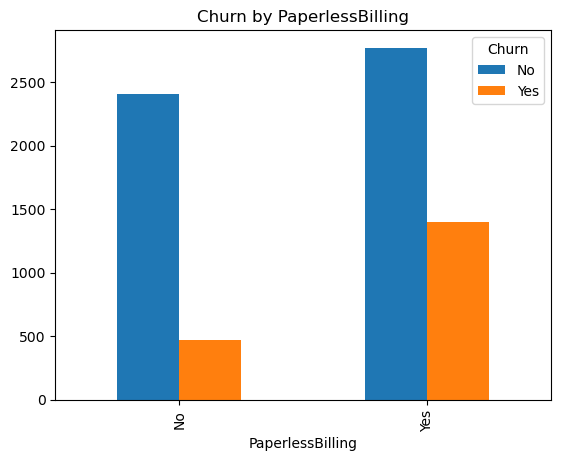

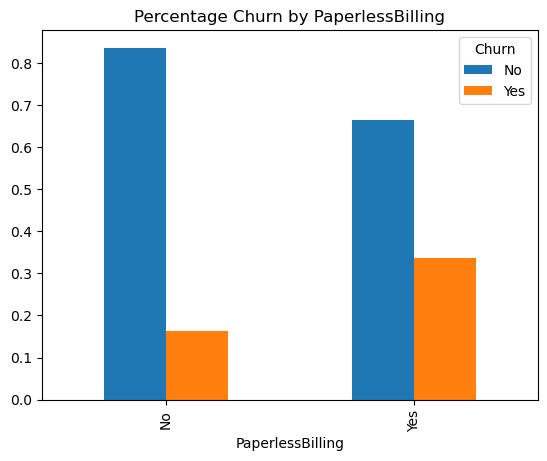

In [40]:
# churn by PaperlessBilling
paperless_billing = (df.groupby('PaperlessBilling')['Churn']
          .value_counts()
          .unstack()
          .plot(kind='bar')
          .set_title('Churn by PaperlessBilling'))

paperless_billing_percent = (df.groupby('PaperlessBilling')['Churn']
          .value_counts(normalize=True)
          .unstack()
          .plot(kind='bar')
          .set_title('Percentage Churn by PaperlessBilling'))

Paperless billing represents 59% of the total customers billing system but has a greater churn rate with 34% compared with 16% for custumers that have paper bill. There is a significant difference in behaviour between customers that are paperless compared with paper billing.

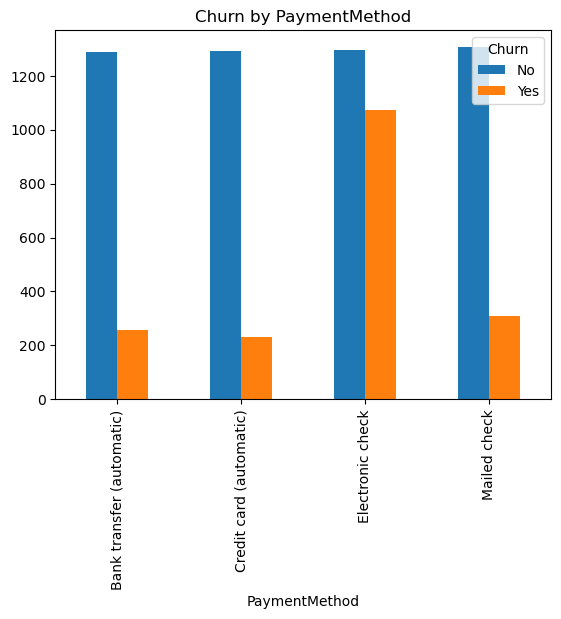

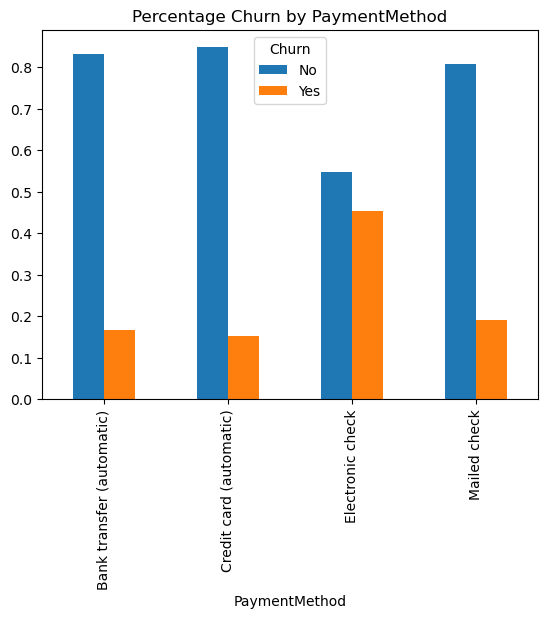

In [41]:
# churn by PaymentMethod
payment_movies = (df.groupby('PaymentMethod')['Churn']
          .value_counts()
          .unstack()
          .plot(kind='bar')
          .set_title('Churn by PaymentMethod'))

payment_percent = (df.groupby('PaymentMethod')['Churn']
          .value_counts(normalize=True)
          .unstack()
          .plot(kind='bar')
          .set_title('Percentage Churn by PaymentMethod'))

Electronic check is the most common form of payments with 33% of the total customers using this method.
However it is also the methode that has the highest churn with 45%


Mailed check represents 23% of the total customers method of payments and has a churn rate of 19%


Bank transfer (automatic) represents 22% of the total customers method of payments and has a churn rate of 17%


Credit card (automatic) represents 22% of the total customers method of payments and has a churn rate of 15%


There is to be a difference in behaviour between customers depending the method of payment they prefer.

#### Numeric Data

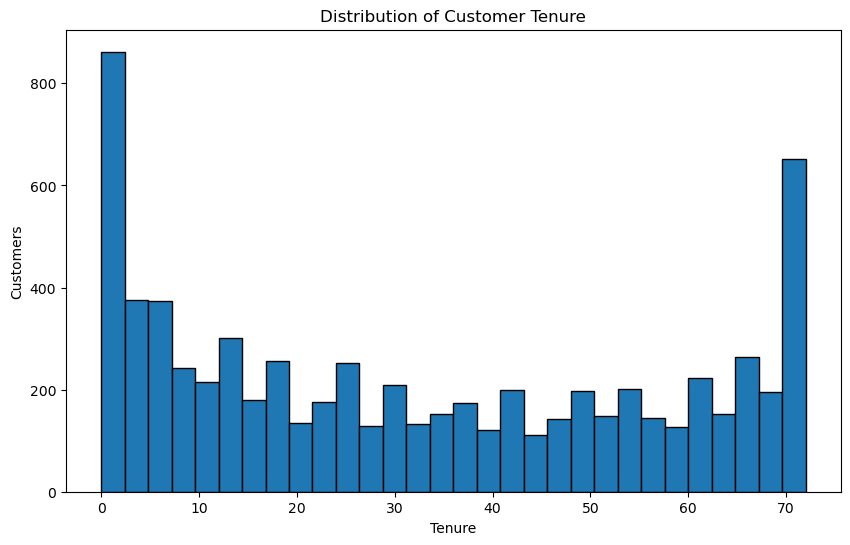

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(df['tenure'], bins=30, edgecolor='black')
plt.xlabel('Tenure')
plt.ylabel('Customers')
plt.title('Distribution of Customer Tenure')
plt.show()

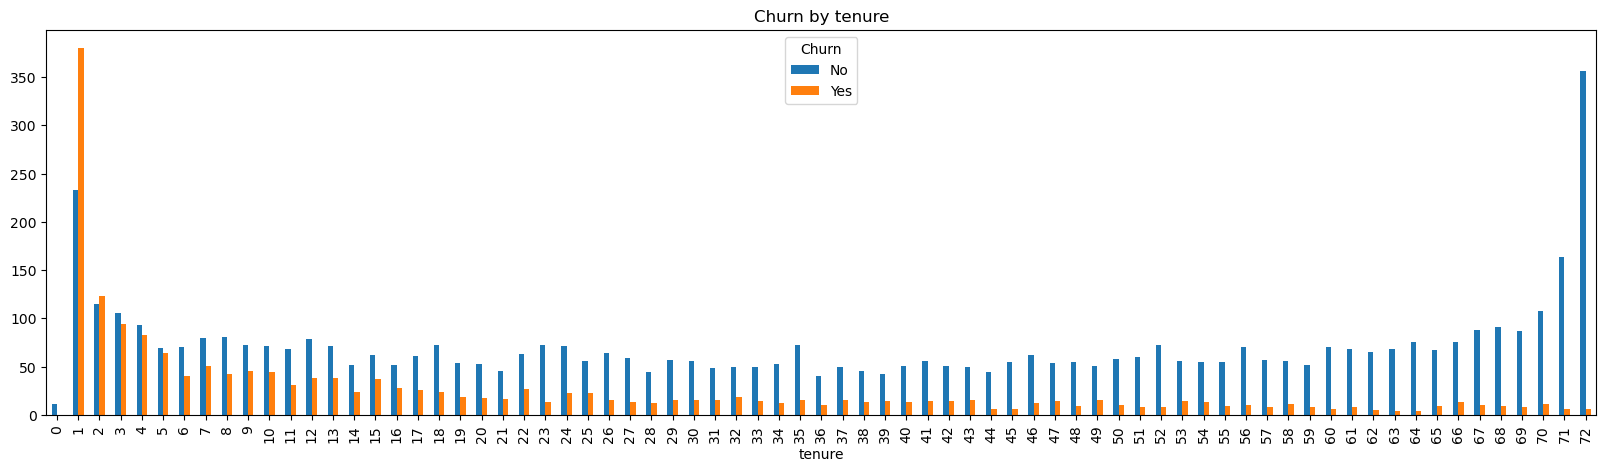

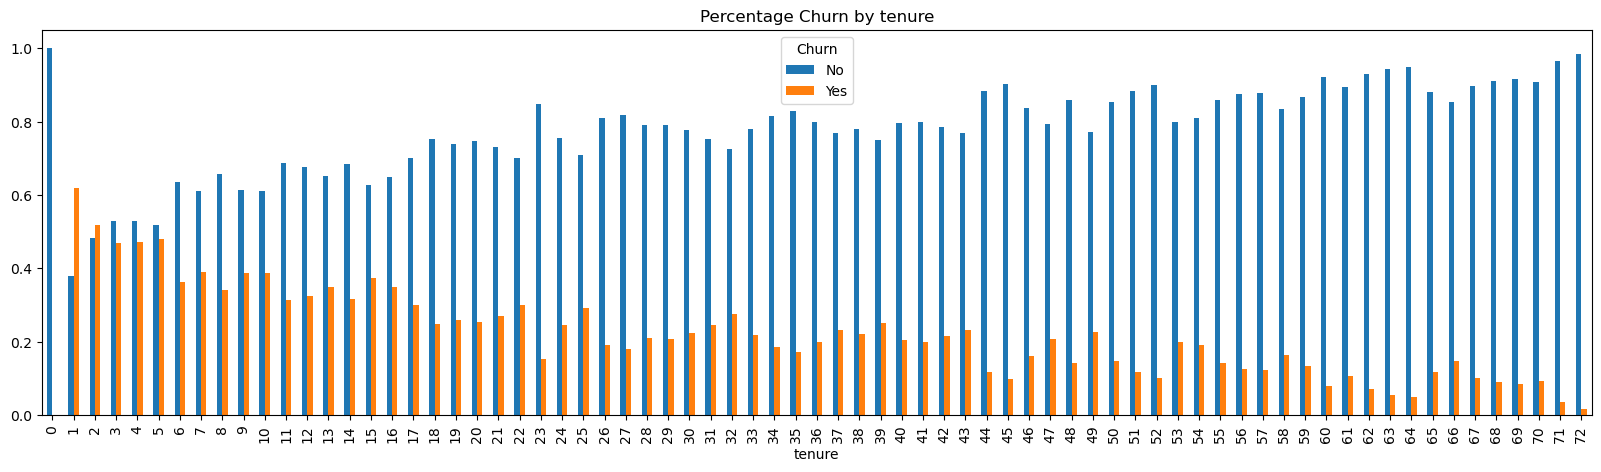

In [43]:
# churn by tenure
tenure = (df.groupby('tenure')['Churn']
          .value_counts()
          .unstack()
          .plot(kind='bar', figsize=(20,5))
          .set_title('Churn by tenure'))

tenure_percent = (df.groupby('tenure')['Churn']
          .value_counts(normalize=True)
          .unstack()
          .plot(kind='bar', figsize=(20,5))
          .set_title('Percentage Churn by tenure'))

The first month of subscription seems to be the high risk month with over 50% of the churn. It seems that the longer the customer stay subscribe the less likely they are to leave in the future.

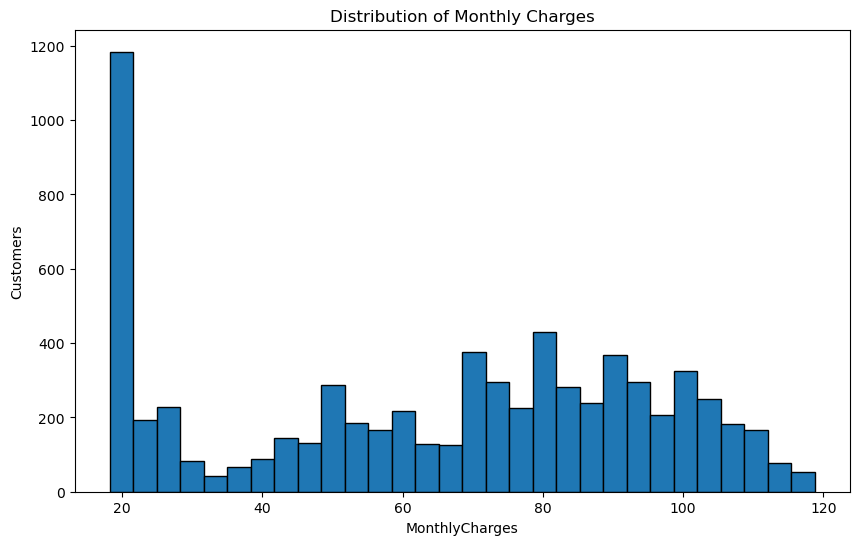

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(df['MonthlyCharges'], bins=30, edgecolor='black')
plt.xlabel('MonthlyCharges')
plt.ylabel('Customers')
plt.title('Distribution of Monthly Charges')
plt.show()

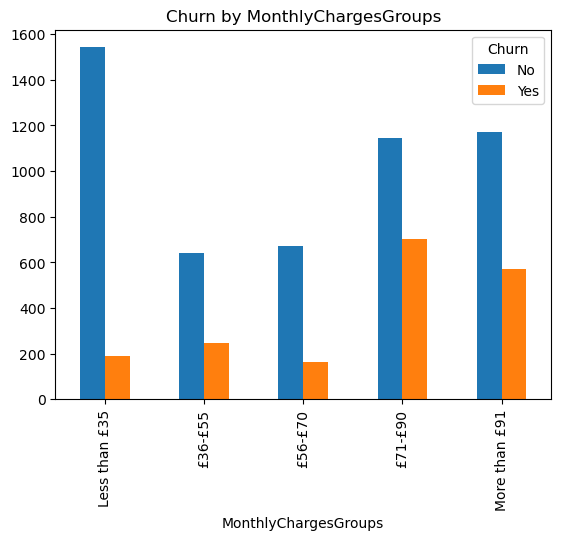

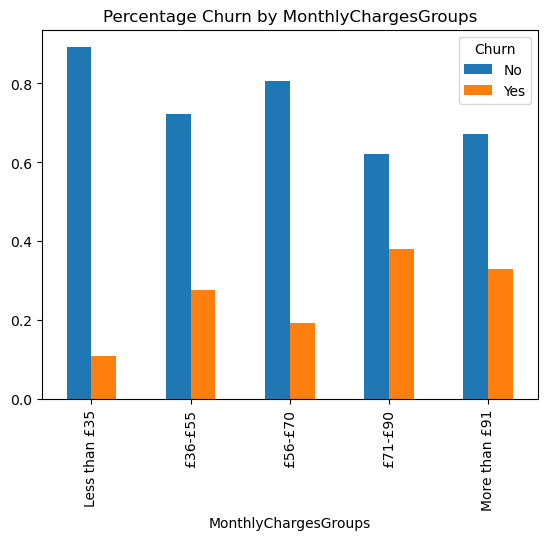

In [45]:
# churn by MonthlyCharges
bins= [0, 35, 55, 70, 90, 120]
labels = ['Less than £35', '£36-£55', '£56-£70', '£71-£90', 'More than £91']
df['MonthlyChargesGroups'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels, right=False)

montly_charges = (df.groupby('MonthlyChargesGroups')['Churn']
          .value_counts()
          .unstack()
          .plot(kind='bar')
          .set_title('Churn by MonthlyChargesGroups'))

montly_charges_percent = (df.groupby('MonthlyChargesGroups')['Churn']
          .value_counts(normalize=True)
          .unstack()
          .plot(kind='bar')
          .set_title('Percentage Churn by MonthlyChargesGroups'))

Lower monthly payments (less than £35) are associated with a lower churn rate (11%), indicating increased loyalty within this customer group. On the other hand, customers with higher payments (£71 and above), especially those paying between £71 and £90, exhibit higher churn rates (37%), emphasizing the importance of managing satisfaction and providing tailored services for this category of customers.

'MonthlyCharges', 'TotalCharges', 'Churn'

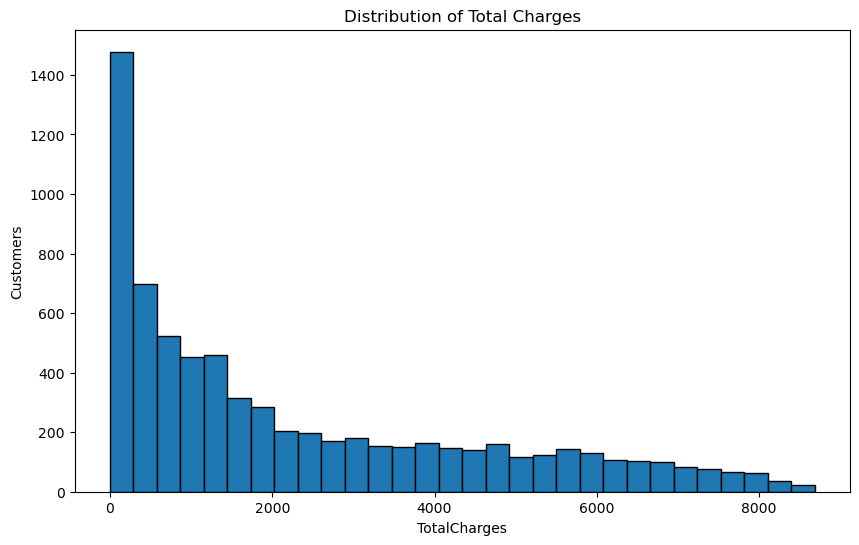

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(df['TotalCharges'], bins=30, edgecolor='black')
plt.xlabel('TotalCharges')
plt.ylabel('Customers')
plt.title('Distribution of Total Charges')
plt.show()

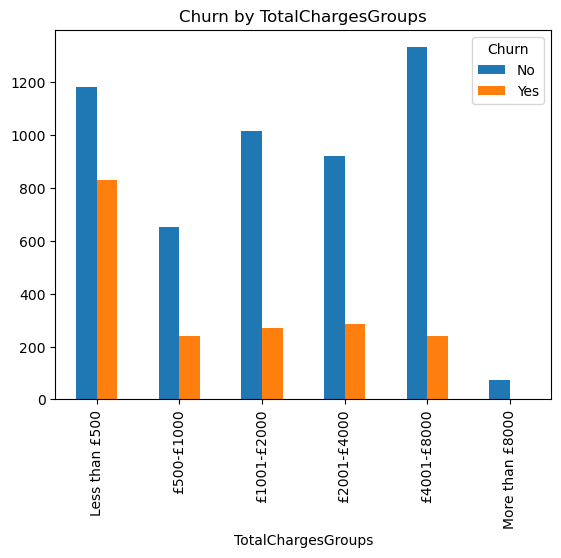

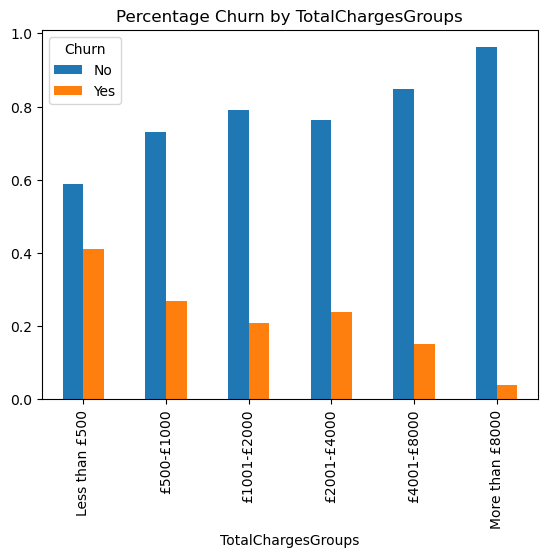

In [47]:
# churn by TotalCharges
bins= [0, 500, 1001, 2001, 4001, 8001, 10000]
labels = ['Less than £500', '£500-£1000',
          '£1001-£2000', '£2001-£4000',
          '£4001-£8000', 'More than £8000']
df['TotalChargesGroups'] = pd.cut(df['TotalCharges'], bins=bins, labels=labels, right=False)

montly_charges = (df.groupby('TotalChargesGroups')['Churn']
          .value_counts()
          .unstack()
          .plot(kind='bar')
          .set_title('Churn by TotalChargesGroups'))

montly_charges_percent = (df.groupby('TotalChargesGroups')['Churn']
          .value_counts(normalize=True)
          .unstack()
          .plot(kind='bar')
          .set_title('Percentage Churn by TotalChargesGroups'))

The more customers spend, the less likely they are to leave, indicating a connection between higher spending and better customer retention.

### Creating a Model

Selecting the Prediction Target

In [48]:
y = df['Churn'].copy()

Feature Selection

In [49]:
X = df.drop(columns=['Churn', 'customerID']).copy()

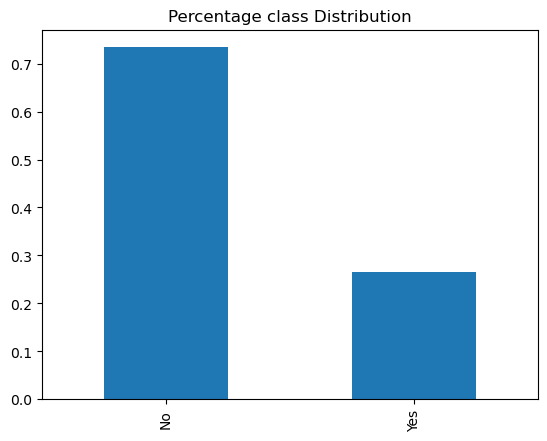

In [50]:
y.value_counts(normalize=True).plot(kind='bar')
plt.title('Percentage class Distribution')
plt.show()

We can see that we have imbalanced data so when we split the data into train/test, we'll split using stratification in order to maintain the same percentage of people who left the company in both train/test set

#### Feature Engineering

We use label encoding to convert non numerical data into interger.

In [51]:
le = LabelEncoder()

X['gender'] = le.fit_transform(X['gender'])
X['Partner'] = le.fit_transform(X['Partner'])
X['Dependents'] = le.fit_transform(X['Dependents'])
X['PhoneService'] = le.fit_transform(X['PhoneService'])
X['MultipleLines'] = le.fit_transform(X['MultipleLines'])
X['InternetService'] = le.fit_transform(X['InternetService'])
X['OnlineSecurity'] = le.fit_transform(X['OnlineSecurity'])
X['OnlineBackup'] = le.fit_transform(X['OnlineBackup'])
X['DeviceProtection'] = le.fit_transform(X['DeviceProtection'])
X['TechSupport'] = le.fit_transform(X['TechSupport'])
X['StreamingTV'] = le.fit_transform(X['StreamingTV'])
X['StreamingMovies'] = le.fit_transform(X['StreamingMovies'])
X['Contract'] = le.fit_transform(X['Contract'])
X['PaperlessBilling'] = le.fit_transform(X['PaperlessBilling'])
X['PaymentMethod'] = le.fit_transform(X['PaymentMethod'])
X['MonthlyChargesGroups'] = le.fit_transform(X['MonthlyChargesGroups'])
X['TotalChargesGroups'] = le.fit_transform(X['TotalChargesGroups'])
y = le.fit_transform(y)

Split the Data

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5282, 21) (5282,)
(1761, 21) (1761,)


In [53]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            seed=42,
                            eval_metric='aucpr',
                            early_stopping_rounds=10)
clf_xgb.fit(X_train, y_train,
            verbose=True,
            eval_set=[(X_test, y_test)]
           )

[0]	validation_0-aucpr:0.62193
[1]	validation_0-aucpr:0.62830
[2]	validation_0-aucpr:0.63752
[3]	validation_0-aucpr:0.64086
[4]	validation_0-aucpr:0.63491
[5]	validation_0-aucpr:0.63814
[6]	validation_0-aucpr:0.64169
[7]	validation_0-aucpr:0.64198
[8]	validation_0-aucpr:0.64275
[9]	validation_0-aucpr:0.64402
[10]	validation_0-aucpr:0.64526
[11]	validation_0-aucpr:0.64514
[12]	validation_0-aucpr:0.64645
[13]	validation_0-aucpr:0.64415
[14]	validation_0-aucpr:0.64135
[15]	validation_0-aucpr:0.64138
[16]	validation_0-aucpr:0.64278
[17]	validation_0-aucpr:0.64239
[18]	validation_0-aucpr:0.64185
[19]	validation_0-aucpr:0.64262
[20]	validation_0-aucpr:0.64277
[21]	validation_0-aucpr:0.64469


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
y_pred = clf_xgb.predict(X_test)
y_pred_proba = clf_xgb.predict_proba(X_test)

In [62]:
cm = confusion_matrix(y_test, y_pred, labels=clf_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Did not leave', 'Left'])

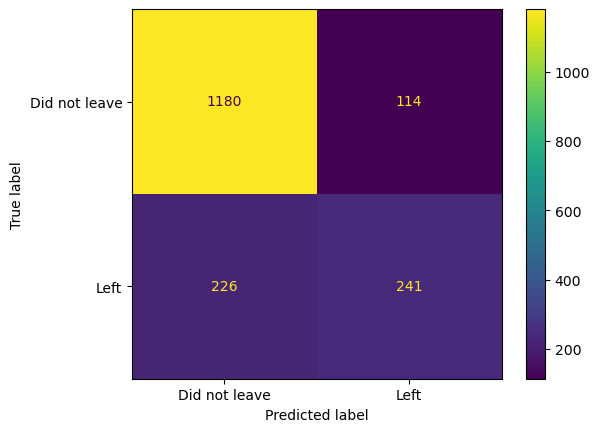

In [63]:
disp.plot()
plt.show()

ROC Curve

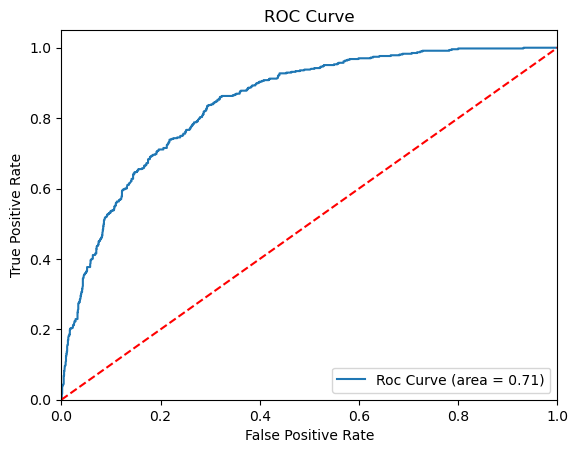

In [66]:
xgb_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Roc Curve (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Optimize Parameters using Cross Validation and GridSearch()

In [87]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5] #sum(neg) / sum(pos) = 2.7683253076511503
}

In [88]:
optim_params = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                        early_stopping_rounds=10,
                                                        eval_metric='auc',
                                                        seed=42,
                                                        subsample=0.9,
                                                        colsample_bytree=0.5),
                           param_grid=param_grid,
                           scoring='roc_auc',
                           verbose=2,
                           n_jobs=10,
                           cv=3)

In [89]:
optim_params.fit(X_train, y_train,
                eval_set=[(X_test, y_test)],
                verbose=False)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, ma...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1.0, 10.0],
                         'scale_pos_weight': [1, 3, 5]},
             scoring='roc_auc', verbose=2)

In [91]:
optim_params.best_params_

{'gamma': 1.0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'reg_lambda': 10.0,
 'scale_pos_weight': 3}

In [92]:
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.1, 0.3, 0.5],
    'gamma': [1.0, 2.0, 2.50],
    'reg_lambda': [10.0, 20.0, 100.0],
    'scale_pos_weight': [3]
}

In [93]:
optim_params = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                        early_stopping_rounds=10,
                                                        eval_metric='auc',
                                                        seed=42,
                                                        subsample=0.9,
                                                        colsample_bytree=0.5),
                           param_grid=param_grid,
                           scoring='roc_auc',
                           verbose=2,
                           n_jobs=10,
                           cv=3)

In [94]:
optim_params.fit(X_train, y_train,
                eval_set=[(X_test, y_test)],
                verbose=False)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, ma...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'gamma': [1.0, 2.0, 2.5],
                         'learning_rate': [0.1, 0.3, 0.5], 'max_depth': [3],
                         'reg_lambda': [10.0, 20.0, 100.0],
                         'scale_pos_weight': [3]},
             scoring='roc_auc', verbose=2)

In [95]:
optim_params.best_params_

{'gamma': 2.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'reg_lambda': 20.0,
 'scale_pos_weight': 3}

In [96]:
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [2.5, 3.0, 3.5],
    'reg_lambda': [20.0],
    'scale_pos_weight': [3]
}

In [97]:
optim_params = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                        early_stopping_rounds=10,
                                                        eval_metric='auc',
                                                        seed=42,
                                                        subsample=0.9,
                                                        colsample_bytree=0.5),
                           param_grid=param_grid,
                           scoring='roc_auc',
                           verbose=2,
                           n_jobs=10,
                           cv=3)

In [98]:
optim_params.fit(X_train, y_train,
                eval_set=[(X_test, y_test)],
                verbose=False)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, ma...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'gamma': [2.5, 3.0, 3.5],
                         'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3],
                         'reg_lambda': [20.0], 'scale_pos_weight': [3]},
             scoring='roc_auc', verbose=2)

In [99]:
optim_params.best_params_

{'gamma': 2.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'reg_lambda': 20.0,
 'scale_pos_weight': 3}

In [100]:
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.1],
    'gamma': [1.0, 1.5, 2.5],
    'reg_lambda': [20.0],
    'scale_pos_weight': [3]
}

In [101]:
optim_params = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                        early_stopping_rounds=10,
                                                        eval_metric='auc',
                                                        seed=42,
                                                        subsample=0.9,
                                                        colsample_bytree=0.5),
                           param_grid=param_grid,
                           scoring='roc_auc',
                           verbose=2,
                           n_jobs=10,
                           cv=3)

In [102]:
optim_params.fit(X_train, y_train,
                eval_set=[(X_test, y_test)],
                verbose=False)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, ma...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'gamma': [1.0, 1.5, 2.5], 'learning_rate': [0.1],
                         'max_depth': [3], 'reg_lambda': [20.0],
                         'scale_pos_weight': [3]},
             scoring='roc_auc', verbose=2)

In [103]:
optim_params.best_params_

{'gamma': 2.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'reg_lambda': 20.0,
 'scale_pos_weight': 3}

In [104]:
clf_xgb_optim = xgb.XGBClassifier(objective='binary:logistic',
                            seed=42,
                            eval_metric='aucpr',
                            early_stopping_rounds=10,
                            gamma=2.5,
                            learning_rate=0.1,
                            max_depth=3,
                            reg_lambda=20.0,
                            scale_pos_weight=3)

clf_xgb_optim.fit(X_train, y_train,
            verbose=True,
            eval_set=[(X_test, y_test)]
           )

[0]	validation_0-aucpr:0.54428
[1]	validation_0-aucpr:0.57580
[2]	validation_0-aucpr:0.59180
[3]	validation_0-aucpr:0.60086
[4]	validation_0-aucpr:0.60041
[5]	validation_0-aucpr:0.60324
[6]	validation_0-aucpr:0.60247
[7]	validation_0-aucpr:0.60308
[8]	validation_0-aucpr:0.60236
[9]	validation_0-aucpr:0.60516
[10]	validation_0-aucpr:0.60869
[11]	validation_0-aucpr:0.60909
[12]	validation_0-aucpr:0.60988
[13]	validation_0-aucpr:0.61091
[14]	validation_0-aucpr:0.61234
[15]	validation_0-aucpr:0.61125
[16]	validation_0-aucpr:0.60871
[17]	validation_0-aucpr:0.61488
[18]	validation_0-aucpr:0.62339
[19]	validation_0-aucpr:0.62766
[20]	validation_0-aucpr:0.62859
[21]	validation_0-aucpr:0.62857
[22]	validation_0-aucpr:0.63151
[23]	validation_0-aucpr:0.62998
[24]	validation_0-aucpr:0.63390
[25]	validation_0-aucpr:0.63200
[26]	validation_0-aucpr:0.63698
[27]	validation_0-aucpr:0.64029
[28]	validation_0-aucpr:0.64221
[29]	validation_0-aucpr:0.64018
[30]	validation_0-aucpr:0.64154
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=2.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [105]:
y_pred_ = clf_xgb_optim.predict(X_test)
y_pred_proba_ = clf_xgb_optim.predict_proba(X_test)

In [106]:
cm_ = confusion_matrix(y_test, y_pred_, labels=clf_xgb_optim.classes_)
disp_ = ConfusionMatrixDisplay(confusion_matrix=cm_,
                              display_labels=['Did not leave', 'Left'])

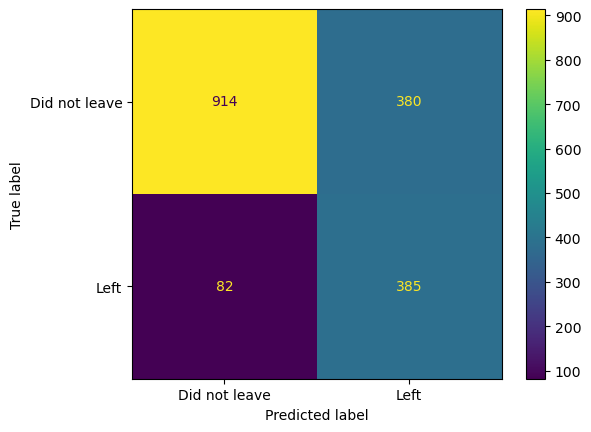

In [107]:
disp_.plot()
plt.show()

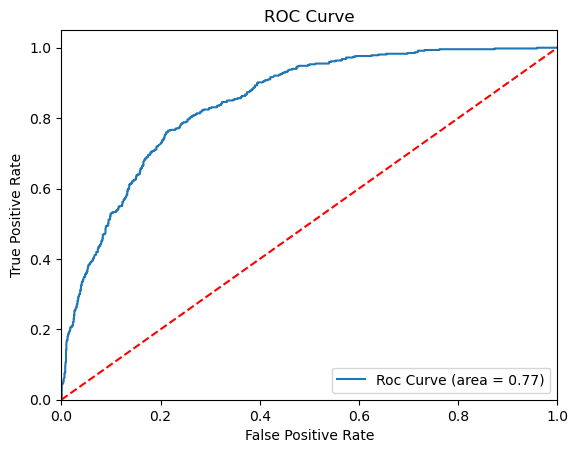

In [109]:
xgb_optim_roc_auc = roc_auc_score(y_test, y_pred_)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Roc Curve (area = %0.2f)' % xgb_optim_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()